<a href="https://colab.research.google.com/github/Gyuyeong/HYAI/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##데이터 생성

In [2]:
import numpy as np

x = np.array([
    [17,12],
    [4,1],
    [7,6],
    [2,4],
    [11,2],


    [10,16],
    [13,23],
    [5,15],
    [14,15],
    [7,20],


    [25,4],
    [25,10],
    [21, 10],
    [20,4],
    [27,15],


])
y = np.array([-1,-1,-1,-1,-1,  0,0,0,0,0,  1,1,1,1,1])

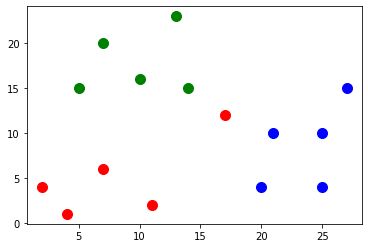

In [3]:
import matplotlib.pyplot as plt

for val, inp in enumerate(x):
  if y[val] == -1:
    plt.scatter(inp[0], inp[1], s=100, c='r')
  elif y[val] == 0:
    plt.scatter(inp[0], inp[1], s=100, c='g')
  else:
    plt.scatter(inp[0], inp[1], s=100, c='b')

##유클리드 거리 함수

In [4]:
import math

def get_distance(point1, point2):
    distance = 0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i])**2
    return math.sqrt(distance)

In [5]:
get_distance([1,1], [2,2])

1.4142135623730951

## KNN 함수 구현

In [6]:
import numpy as np

def knn(new, x, y, k):
    neighbor_distance = []
    for i in x:
        neighbor_distance.append(get_distance(new, i))
    
    sorted = np.sort(neighbor_distance)
    sorted_idx = np.argsort(neighbor_distance)

    y_sorted = [y[i] for i in sorted_idx]

    return max(y_sorted[:k], key=y_sorted[:k].count)

In [7]:
knn([15,9],x,y, 1)

-1

##임의의 데이터 대량 생성

In [8]:
import random
x_sample = []
for i in range(4000):
    x_sample.append([random.uniform(0, 30), random.uniform(0, 25)])

print(x_sample)

[[9.023413295501598, 18.6578814852178], [8.765829741840353, 16.5240901447892], [4.066038008329626, 10.516482642441446], [10.990710141580578, 1.8992112747822754], [20.089306471566644, 24.937126025578944], [20.63279232591654, 9.69752283119924], [24.06513896755524, 22.03967986881968], [11.507602788127434, 23.552074190635164], [8.868557937778718, 9.44947443998079], [17.344238251514035, 0.7738202651739995], [19.56796210768359, 23.245436928636238], [10.2233318775936, 23.75779812139085], [22.228113333502424, 0.8126076911362495], [13.034993577292603, 17.82832586876019], [14.524698984736396, 21.78916011141182], [18.107563676489523, 14.819908281403807], [21.109515310293535, 6.777769889985438], [2.4495439024305945, 6.443670212483102], [28.81024272917186, 7.512912108316685], [22.070876715656855, 18.76234281585878], [0.34477426690351365, 3.6481360555675497], [3.913973833282359, 20.387291550118565], [11.874633803232346, 2.2860576368672056], [6.238201117841077, 0.7659621183704501], [14.50474035249897

## k값에 따른 decision boundary의 변화

### k = 1일때

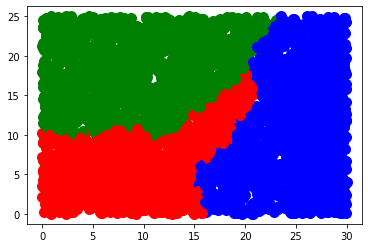

In [9]:
import matplotlib.pyplot as plt

for i in range(len(x_sample)):
    if knn(x_sample[i], x, y,  1) == -1:
        plt.scatter(x_sample[i][0], x_sample[i][1], s=100, c='r')
    elif knn(x_sample[i], x, y,  1) == 0:
        plt.scatter(x_sample[i][0], x_sample[i][1], s=100, c='g')
    else:
        plt.scatter(x_sample[i][0], x_sample[i][1], s=100, c='b')

### k=3일때

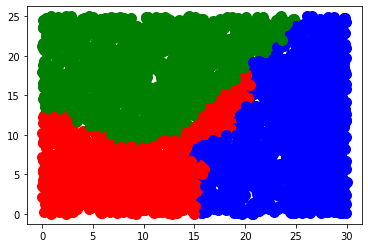

In [10]:
import matplotlib.pyplot as plt

for i in range(len(x_sample)):
    if knn(x_sample[i], x, y,  3) == -1:
        plt.scatter(x_sample[i][0], x_sample[i][1], s=100, c='r')
    elif knn(x_sample[i], x, y,  3) == 0:
        plt.scatter(x_sample[i][0], x_sample[i][1], s=100, c='g')
    else:
        plt.scatter(x_sample[i][0], x_sample[i][1], s=100, c='b')

###k=5일때

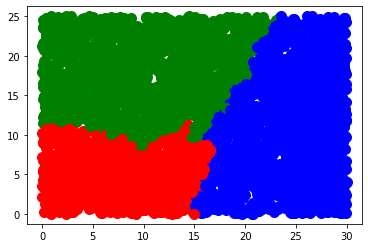

In [11]:
import matplotlib.pyplot as plt

for i in range(len(x_sample)):
    if knn(x_sample[i], x, y,  5) == -1:
        plt.scatter(x_sample[i][0], x_sample[i][1], s=100, c='r')
    elif knn(x_sample[i], x, y,  5) == 0:
        plt.scatter(x_sample[i][0], x_sample[i][1], s=100, c='g')
    else:
        plt.scatter(x_sample[i][0], x_sample[i][1], s=100, c='b')

k값이 커질수록 overfitting에서 underfitting의 방향으로 간다.

##Iris Data sklearn

In [12]:
from sklearn import datasets
iris = datasets.load_iris()

In [13]:
x_data = []
y_data = []
for i in range(len(iris['data'])):
    x_data.append(iris['data'][i][:2])
    y_data.append(iris['target'][i])

In [14]:
x_data = np.array(x_data)
y_data = np.array(y_data)

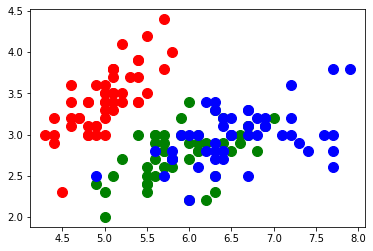

In [15]:
for val, inp in enumerate(x_data):
  if y_data[val] == 0:
    plt.scatter(inp[0], inp[1], s=100, c='r')
  elif y_data[val] == 1:
    plt.scatter(inp[0], inp[1], s=100, c='g')
  else:
    plt.scatter(inp[0], inp[1], s=100, c='b')

In [16]:
x_sample = []
for i in range(4000):
    x_sample.append([random.uniform(4, 8), random.uniform(2, 4.5)])
    
print(x_sample)

[[4.209212574706282, 3.676966925949325], [5.193330966927048, 3.533238069824457], [5.685609595713379, 3.4568186260704894], [7.363520180157991, 2.182533550138945], [7.240080644002047, 4.306072375254857], [6.116599146819102, 4.006317196416757], [6.448797493453967, 4.468857211023856], [4.067901078791523, 3.9118671355086088], [5.411705999384992, 4.2793610751017255], [6.7620181175252245, 3.1714715376956386], [7.086884309184133, 3.888851615684637], [5.709755459988283, 3.1032308937319586], [6.009562907550891, 3.3937736196962485], [6.415655443653427, 2.78774385161504], [6.250226267946563, 3.2085008865123252], [7.423420150482389, 2.205908948624408], [6.859217037538963, 2.680270342542133], [6.376271265236378, 3.7834210679642526], [7.227791763142394, 3.5394579954522114], [5.579528169329117, 2.732528883085493], [5.04905098765251, 3.024644326569981], [6.2343262437813465, 2.235829938308538], [5.460558671675056, 2.3684123059125475], [5.486296114774616, 4.270416751193288], [5.328923998919581, 2.3463042

## K값에 따른 Decision Boundary

###k=1일때

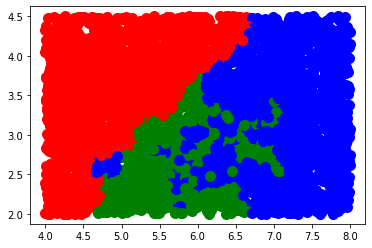

In [17]:
for i in range(len(x_sample)):
    if knn(x_sample[i], x_data, y_data,  1) == 0:
        plt.scatter(x_sample[i][0], x_sample[i][1], s=100, c='r')
    elif knn(x_sample[i], x_data, y_data,  1) == 1:
        plt.scatter(x_sample[i][0], x_sample[i][1], s=100, c='g')
    else:
        plt.scatter(x_sample[i][0], x_sample[i][1], s=100, c='b')

###k=3일때

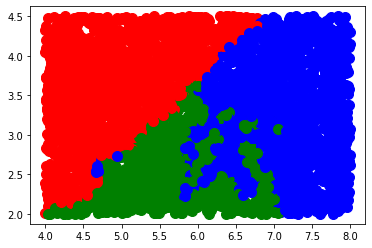

In [18]:
for i in range(len(x_sample)):
    if knn(x_sample[i], x_data, y_data,  3) == 0:
        plt.scatter(x_sample[i][0], x_sample[i][1], s=100, c='r')
    elif knn(x_sample[i], x_data, y_data,  3) == 1:
        plt.scatter(x_sample[i][0], x_sample[i][1], s=100, c='g')
    else:
        plt.scatter(x_sample[i][0], x_sample[i][1], s=100, c='b')

###k=40일때

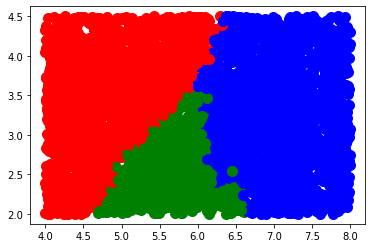

In [19]:
for i in range(len(x_sample)):
    if knn(x_sample[i], x_data, y_data,  40) == 0:
        plt.scatter(x_sample[i][0], x_sample[i][1], s=100, c='r')
    elif knn(x_sample[i], x_data, y_data,  40) == 1:
        plt.scatter(x_sample[i][0], x_sample[i][1], s=100, c='g')
    else:
        plt.scatter(x_sample[i][0], x_sample[i][1], s=100, c='b')

그래서 k값이 얼마일 때 가장 최적의 값인가?

##Train-Test Split

In [20]:
y_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 데이터를 무작위로 섞어준다

In [21]:
idx = np.arange(x_data.shape[0])
np.random.shuffle(idx)

x_shuffle = x_data[idx]
y_shuffle = y_data[idx]

In [22]:
y_shuffle

array([2, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 0, 0, 0, 2, 0, 2, 2, 0,
       0, 0, 1, 0, 2, 1, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 0, 2, 0, 2, 2, 1,
       1, 0, 2, 0, 0, 1, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 2, 0, 1, 0, 1, 1, 0, 2, 0, 2, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 2, 2, 0, 1, 2, 1, 1, 0, 2, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 0, 2, 2, 0, 2, 1, 0, 2, 0, 2, 2, 0, 0])

In [23]:
x_train, x_validation, y_train, y_validation = x_shuffle[:100], x_shuffle[100:], y_shuffle[:100], y_shuffle[100:]

## Grid-Search

In [24]:
def gridsearch(k_parameters):
    pred = 0
    best = 0
    idx = 0
    for i in k_parameters:
        for j in range(len(x_validation)):
            pred += y_validation[j] == knn(x_validation[j], x_train, y_train, i)
        if pred/len(x_validation) > best:
            best = pred/len(x_validation)
            idx = i
        pred = 0

    print(f"k가 {idx}일 때 {best} 의 정확도로 제일 높습니다.")

In [25]:
params = [i for i in range(1, 200)]
gridsearch(params)

k가 37일 때 0.78 의 정확도로 제일 높습니다.


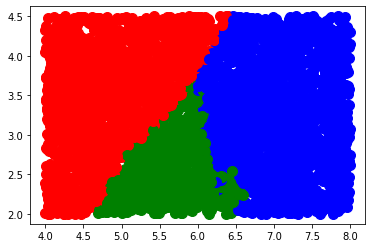

In [26]:
for i in range(len(x_sample)):
    if knn(x_sample[i], x_data, y_data, 37) == 0:
        plt.scatter(x_sample[i][0], x_sample[i][1], s=100, c='r')
    elif knn(x_sample[i], x_data, y_data, 37) == 1:
        plt.scatter(x_sample[i][0], x_sample[i][1], s=100, c='g')
    else:
        plt.scatter(x_sample[i][0], x_sample[i][1], s=100, c='b')